# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
taxi = pd.DataFrame(
    data={
        'Passangers': list(range(1,6)),
        'taxi_meter': [7.5, 10, 12.5, 15, 17.5],
        'Paid (incl. tips)': [8, 10, 14, 15, 20],
    }
)

taxi

,Passangers,taxi_meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


In [3]:
taxi.set_index('Passangers')[['taxi_meter']]

,taxi_meter
Passangers,
1,7.5
2,10.0
3,12.5
4,15.0
5,17.5


In [4]:
taxi.set_index('Passangers')[['taxi_meter', 'Paid (incl. tips)']]

,taxi_meter,Paid (incl. tips)
Passangers,,
1,7.5,8
2,10.0,10
3,12.5,14
4,15.0,15
5,17.5,20


(-0.1, 20.5)

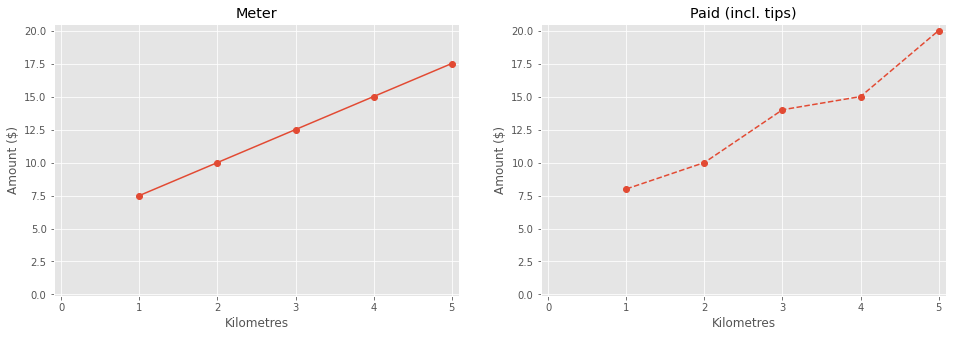

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharex=False, sharey=False)
taxi.set_index('Passangers')['taxi_meter'].plot(title='Meter', kind='line', marker='o', zorder=1, ax=axs[0])
taxi.set_index('Passangers')['Paid (incl. tips)'].plot(title='Paid (incl. tips)', kind='line', marker='o', linestyle='--', ax=axs[1])


axs[0].set_xlabel('Kilometres')
axs[1].set_xlabel('Kilometres')

axs[0].set_ylabel('Amount ($)')
axs[1].set_ylabel('Amount ($)')

axs[0].set_xlim((-0.1,5.1))
axs[0].set_ylim((-0.1,20.5))

axs[1].set_xlim((-0.1,5.1))
axs[1].set_ylim((-0.1,20.5))

## Running Linear Regression

In [8]:
taxi

,Passangers,taxi_meter,Paid (incl. tips)
0,1,7.5,8
1,2,10.0,10
2,3,12.5,14
3,4,15.0,15
4,5,17.5,20


In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(taxi[['Passangers']], taxi['Paid (incl. tips)'])

taxi['Paid (Predicted)'] = reg.predict(taxi[['Passangers']])

In [10]:
print(
    f'Amount Paid = {reg.intercept_:.1f} + {reg.coef_[0]:.1f} * Distance'
) 

Amount Paid = 4.7 + 2.9 * Distance


## Plotting the Regressed Line
In higher dimensions, the line will be a hyperplane

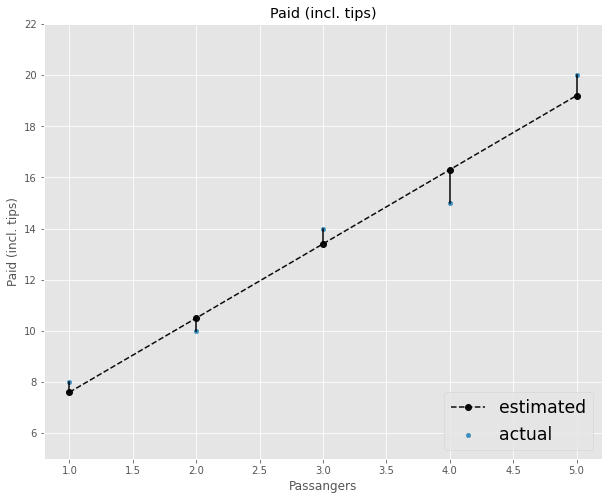

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), sharex=False, sharey=False)

taxi.tail(5).plot(
    label='actual', kind='scatter', x='Passangers', y='Paid (incl. tips)',
    marker='o', alpha=0.95, ax=ax
)

taxi.tail(5).set_index('Passangers')['Paid (Predicted)'].plot(
    title='Paid (incl. tips)', label='estimated', kind='line', 
    marker='o', linestyle='--', color='k', alpha=0.95, ax=ax
)

x_min, m_max = 0.8, 5.2
y_min, y_max = 5, 22

ax.set_xlim((x_min, m_max))
ax.set_ylim((y_min, y_max))

for x, y1, y2 in taxi.tail(5)[
    ['Passangers', 'Paid (incl. tips)', 'Paid (Predicted)']
].values.tolist():
    ymin, ymax = min(y1, y2), max(y1, y2)
    ymin, ymax = (ymin-y_min)/(y_max-y_min) , (ymax-y_min)/(y_max-y_min)
    ax.axvline(x=x, ymin=ymin, ymax=ymax, color='k')

ax.legend(loc='lower right', fontsize='xx-large')